In [1]:
    
from library.Accessor import Accessor
from library.attributionUtils import get_attributes,adversarial_detection_set
from library.attributions import multiply_attributed_with_input,number_of_active_nodes
import torch
import numpy as np

c:\Users\ata\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


begning_accessor = Accessor('./begnign/mnist/mnist_1')
adversarial_accessor= Accessor('./adversarial/mnist/FGSM/mnist_1')
ground_truth_accessor = Accessor('./Ground_truth/mnist/mnist_1')
expected_nb_nodes = 420

begning_sample_act = begning_accessor.get_all()
adv_sample_act = adversarial_accessor.get_all()
gt_sample_act = ground_truth_accessor.get_all()



# Transforms the activations to the folowing data set : x[activationA,activaitonB,...]  y= [1, 0 ,1...]
X_adv,Y_adv=adversarial_detection_set(adv_sample_act,label = torch.tensor(1),expected_nb_nodes=expected_nb_nodes)
X_ben,Y_ben=adversarial_detection_set(begning_sample_act,label = torch.tensor(0),expected_nb_nodes =expected_nb_nodes)
X_gt ,Y_gt =adversarial_detection_set(gt_sample_act,label = torch.tensor(0),expected_nb_nodes=expected_nb_nodes)


Loaded all activations for ./begnign/mnist/mnist_1
Loaded all activations for ./adversarial/mnist/FGSM/mnist_1
Loaded all activations for ./Ground_truth/mnist/mnist_1
[GRAPH LEARN] [SET GENERATION] Ignored 0 Samples
[GRAPH LEARN] [SET GENERATION] Ignored 1 Samples
[GRAPH LEARN] [SET GENERATION] Ignored 1 Samples


c:\Users\ata\Desktop\Research\fall 2022\ProvML\library\attributionUtils.py:286: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y.append(torch.tensor(label))


Average Weight Adv :28.15106599114492 Ben : 1507.1138706265997 Gt : 638.3218422687328 


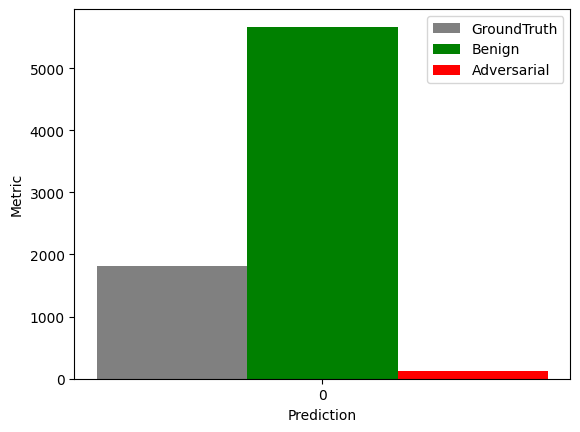

In [3]:
model = torch.load('./advDetectionModels/test.pt')

adv_attr =multiply_attributed_with_input(X_adv,Y_adv,model)
ben_attr =multiply_attributed_with_input(X_ben,Y_ben,model)
gt_attr =multiply_attributed_with_input(X_gt,Y_gt,model)

avg_adv = [np.average(i) for i in adv_attr]
ben_attr = [np.average(i) for i in ben_attr]
gt_attr = [np.average(i) for i in gt_attr]

print(f'Average Weight Adv :{np.average(avg_adv)} Ben : {np.average(ben_attr)} Gt : {np.average(gt_attr)} ')


from library.utils import plotAcrossPredictions

plotAcrossPredictions(gt_attr,ben_attr,avg_adv,1)


Average ben : 100.48643493652344  adv 169.1399688720703
Range [ 53.0361328125 :146.19403076171875]   adv 5.358020782470703 :784.0498657226562 
Average ben : 531.415771484375  adv 1204.8739013671875
Range [ 6.138496398925781 :1832.6866455078125]   adv 205.98800659179688 :2091.3671875 
Average ben : 250.55947875976562  adv 178.54844665527344
Range [ 44.563053131103516 :488.17950439453125]   adv 110.69062805175781 :254.3573760986328 
Average ben : 207.09326171875  adv 301.49615478515625
Range [ 0.966728925704956 :683.7551879882812]   adv 97.19274139404297 :736.4532470703125 
Average ben : 91.3318099975586  adv 180.39280700683594
Range [ 5.730566501617432 :266.7930603027344]   adv 7.4772539138793945 :360.8243103027344 
Average ben : 746.6480102539062  adv 633.0192260742188
Range [ 140.57852172851562 :1801.6219482421875]   adv 40.802799224853516 :1631.857177734375 
Average ben : 840.9290161132812  adv 1071.367431640625
Range [ 7.9552764892578125 :2059.69921875]   adv 7.9552764892578125 :250

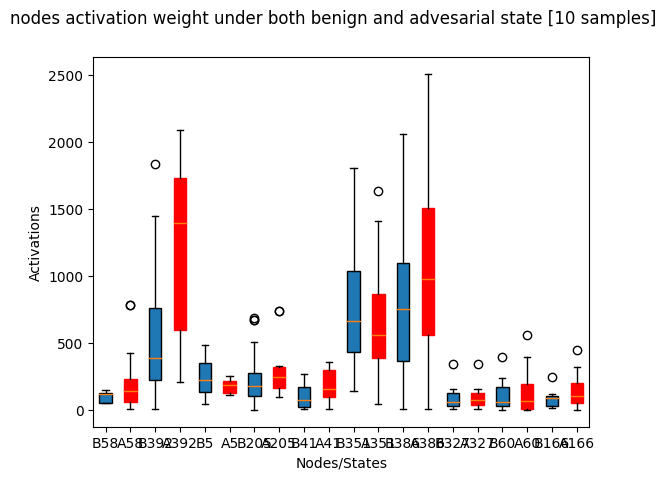

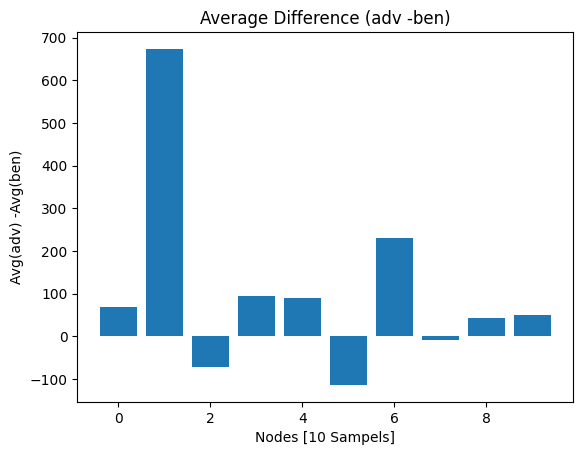

In [4]:
from library.attributionUtils import get_nodes_weight_per_label,box_plot
from keras.utils import to_categorical
X = X_ben + X_adv
Y = Y_ben+ Y_adv
Y = to_categorical(Y)
#Positive and negatie to begnign decision
ben ,adv = get_nodes_weight_per_label(0,expected_nb_nodes,X,Y,model)

#Positive and negative to adversaraial decision 
adv_ ,ben_ = get_nodes_weight_per_label(1,expected_nb_nodes,X,Y,model)

box_plot(ben,ben_,adv,adv_,expected_nb_nodes)


In [5]:
from library.attributionUtils import scatter,predict_torch,representative_set

prediction = predict_torch(model,X,batch=True).item()
attributes = get_attributes(input,model,prediction)           
scatter()

tensor([ 3.5982e+02,  0.0000e+00,  0.0000e+00,  1.3247e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.8429e+02,  5.3958e+02,  4.2230e+00,
         0.0000e+00,  0.0000e+00,  5.4211e+02,  1.3995e+02,  0.0000e+00,
         5.2045e+02,  0.0000e+00,  8.8793e+01,  1.6891e+02,  0.0000e+00,
         3.6398e+01,  0.0000e+00,  0.0000e+00,  1.5153e+02,  0.0000e+00,
         0.0000e+00,  1.8523e+02,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         3.9285e+01,  0.0000e+00,  0.0000e+00,  2.3520e+02,  0.0000e+00,
         6.0300e+02,  0.0000e+00,  2.4697e+02,  7.1856e+02,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  3.5518e+02,  5.1869e+02,  0.0000e+00,
         8.5703e+01,  0.0000e+00,  0.0000e+00,  1.8397e+02,  0.0000e+00,
         0.0000e+00,  7.3403e+02,  4.4235e+02,  5.0946e+02,  0.0000e+00,
         1.2217e+02,  4.4816e+02,  2.9117e+02,  0.0000e+00,  1.7578e+02,
         1.0066e+02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1099e+02,
         3.2946e+02,  4.5216e+02,  2.3089e+01,  4.3

RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [420]